In [10]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from data_utils import generate_ground_truth_matrix, ground_truth_matrix_to_dataset, correlation
import reclab

[0.9999866761847309, 0.8292083441452414, 0.3345736105801199, 0.0681189073295451, 0.0263418316403442, 0.011158285164614923, 0.010822254753122925, 0.014845273899994767, 0.006680125156642548, 0.00895334289075604]


/var/folders/p2/v6y91c591nq_2q129bwd64bc0000gn/T/ipykernel_25486/428221549.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


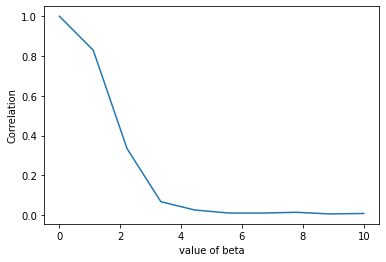

In [12]:
# Beta vs Pearson correlation

def correlation_train(beta, correlation_metric):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-dynamic-v1')
    users, items, ratings, P, R = ground_truth_matrix_to_dataset(
        truth, quantization='onetofive', bias='full underlying', beta=beta)
    return correlation(P, truth, correlation_metric)


beta = np.linspace(0.01, 10, 10)
pearson = [correlation_train(i, 'pearson') for i in beta]
print(pearson)
fig1, ax = plt.subplots()
ax.plot(beta, pearson)
ax.set(xlabel='value of beta', ylabel='correlation')
fig1.show()
